Origin from Amin

In [ ]:
import requests
athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
response = requests.get(athlete_url,headers=headers)
page_contents = response.text
with open('Athelete.html','w', encoding="utf-8") as f:
    f.write(page_contents)
    
import bs4
from bs4 import BeautifulSoup
doc = BeautifulSoup(page_contents,'html.parser')

selection_class = "slide-title-text"
Athlete_name_tags = doc.find_all('h2',{'class':selection_class})

athlete_names = []

for tag in Athlete_name_tags:
    athlete_names.append(tag.text.strip())

# Now, you can print or use the athlete_names list as needed
for name in athlete_names:
    print(f"Athlete Name: {name}")

Modification from original - Keep this

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
response = requests.get(athlete_url,headers=headers)
page_contents = response.text
with open('Athelete.html','w', encoding="utf-8") as f:
    f.write(page_contents)
    
soup = BeautifulSoup(page_contents,'html.parser')

selection_class = "slide-title-text"
Athlete_name_tags = soup.find_all('h2',{'class':selection_class})

athlete_names = []

# Loop through each athlete name tag
for tag in Athlete_name_tags:
    # Split the text by " — " to separate rank, name, and earnings
    rank, name_earnings = tag.get_text().split('. ')
    name, earnings = name_earnings.split(' — $')

    # Append the extracted data to the list
    athlete_names.append({'Rank': rank, 'Athlete Name': name, 'Earnings': earnings})

# Create a DataFrame from the list
df = pd.DataFrame(athlete_names)

print(df)

Sample of the find 'p'

Keep for further reference & modification

In [ ]:
athlete_data_tags = soup.find_all('p')

athlete_data = []

for tag in athlete_data_tags:
    athlete_data.append(tag.text.strip())

# Now, you can print or use the athlete_names list as needed
for data in athlete_data:
    print(data)

With the Sample of the find 'p' above

Modification and test successful

need some modification & for merging with earlier data frame

In [ ]:
athlete_data = [] # data_test = [] change to athlete_data = []

paragraphs = soup.find_all('p')

# Loop through each paragraph and extract Sport and Nationality
for i in range(0, len(paragraphs), 2):
    strong_sport = paragraphs[i].find('strong')
    strong_nationality = paragraphs[i + 1].find('strong')
    
    if strong_sport and strong_nationality:
        sport = strong_sport.next_sibling.strip()
        nationality = strong_nationality.next_sibling.strip()
        athlete_data.append({'Sport': sport, 'Nationality': nationality})

# Create a Pandas DataFrame
df = pd.DataFrame(athlete_data)

# Print the DataFrame
df

Modified version from the origin

This is without the Sport & Nationality; 

This include plot and working fine

This will be the main reference for the below code

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the webpage content
athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
response = requests.get(athlete_url, headers=headers)
page_contents = response.text

# Create a BeautifulSoup object
soup = BeautifulSoup(page_contents, 'html.parser')

# Extract athlete names and earnings
selection_class = "slide-title-text"
Athlete_name_tags = soup.find_all('h2', {'class': selection_class})

athlete_names = [] # athlete_data = [] change to athlete_names = []

# Loop through each athlete name tag
for tag in Athlete_name_tags:
    rank, name_earnings = tag.get_text().split('. ')
    name, earnings = name_earnings.split(' — $')
    athlete_names.append({'Rank': rank, 'Athlete Name': name, 'Earnings': earnings})

# Create a DataFrame
df = pd.DataFrame(athlete_names)

# Convert earnings to numeric values (remove "million" or "billion")
df['Earnings'] = df['Earnings'].apply(lambda x: int(float(x.replace(" million", "").replace(" billion", "")) * 1e6 if "million" in x.lower() else float(x.replace(" billion", "")) * 1e9))

df

In [ ]:
# Create a bar plot for earnings
plt.figure(figsize=(10, 6))
plt.bar(df['Athlete Name'], df['Earnings'])
plt.xlabel('Athlete Name')
plt.ylabel('Earnings (USD)')
plt.title('Top Earning Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Good example of having 2 sets of data frames to be in one form but need to combine into 1 data frame

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the webpage content
athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
response = requests.get(athlete_url, headers=headers)
page_contents = response.text

# Create a BeautifulSoup object
soup = BeautifulSoup(page_contents, 'html.parser')

# Extract athlete names and earnings
selection_class = "slide-title-text"
Athlete_name_tags = soup.find_all('h2', {'class': selection_class})

athlete_names = [] # athlete_data = [] change to athlete_names = []

# Loop through each athlete name tag
for tag in Athlete_name_tags:
    rank, name_earnings = tag.get_text().split('. ')
    name, earnings = name_earnings.split(' — $')
    athlete_names.append({'Rank': rank, 'Athlete Name': name, 'Earnings': earnings})

# Create a DataFrame for athlete data
athlete_df = pd.DataFrame(athlete_names)

# Convert earnings to numeric values (remove "million" or "billion")
athlete_df['Earnings'] = athlete_df['Earnings'].apply(lambda x: int(float(x.replace(" million", "").replace(" billion", "")) * 1e6 if "million" in x.lower() else float(x.replace(" billion", "")) * 1e9))

# Extract Sport and Nationality data
athlete_data = [] # data_test = [] change to athlete_data = []
paragraphs = soup.find_all('p')

# Loop through each paragraph and extract Sport and Nationality
for i in range(0, len(paragraphs), 2):
    strong_sport = paragraphs[i].find('strong')
    strong_nationality = paragraphs[i + 1].find('strong')
    
    if strong_sport and strong_nationality:
        sport = strong_sport.next_sibling.strip()
        nationality = strong_nationality.next_sibling.strip()
        athlete_data.append({'Sport': sport, 'Nationality': nationality})

# Create a DataFrame for Sport and Nationality data
sport_nationality_df = pd.DataFrame(athlete_data)

# Print the DataFrames
print("Athlete DataFrame:")
print(athlete_df)

print("\nSport and Nationality DataFrame:")
print(sport_nationality_df)

Test only - ignore

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the webpage content
athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
response = requests.get(athlete_url, headers=headers)
page_contents = response.text

# Create a BeautifulSoup object
soup = BeautifulSoup(page_contents, 'html.parser')

# Extract athlete names and earnings
selection_class = "slide-title-text"
Athlete_name_tags = soup.find_all('h2', {'class': selection_class})

athlete_names = [] # athlete_data = [] change to athlete_names = []

# Loop through each athlete name tag
for tag in Athlete_name_tags:
    rank, name_earnings = tag.get_text().split('. ')
    name, earnings = name_earnings.split(' — $')
    athlete_names.append({'Rank': rank, 'Athlete Name': name.strip(), 'Earnings': earnings})

# Create a DataFrame for athlete data
athlete_df = pd.DataFrame(athlete_names)

# Print athlete names from the athlete_df DataFrame
print("Athlete names in athlete_df:")
print(athlete_df['Athlete Name'].tolist())

# Convert earnings to numeric values (remove "million" or "billion")
athlete_df['Earnings'] = athlete_df['Earnings'].apply(lambda x: int(float(x.replace(" million", "").replace(" billion", "")) * 1e6 if "million" in x.lower() else float(x.replace(" billion", "")) * 1e9))

# Extract Sport and Nationality data
athlete_data = [] # data_test = [] change to athlete_data = []
paragraphs = soup.find_all('p')

# Loop through each paragraph and extract Sport and Nationality
for i in range(0, len(paragraphs), 2):
    strong_sport = paragraphs[i].find('strong')
    strong_nationality = paragraphs[i + 1].find('strong')
    
    if strong_sport and strong_nationality:
        sport = strong_sport.next_sibling.strip()
        nationality = strong_nationality.next_sibling.strip()
        athlete_data.append({'Athlete Name': None, 'Sport': sport, 'Nationality': nationality})

# Create a DataFrame for Sport and Nationality data
sport_nationality_df = pd.DataFrame(athlete_data)

# Print athlete names from the sport_nationality_df DataFrame
print("\nAthlete names in sport_nationality_df:")
print(sport_nationality_df['Athlete Name'].tolist())

# Merge the two DataFrames based on Athlete Name
final_df = pd.merge(athlete_df, sport_nationality_df, on='Athlete Name', how='left')

# Print the final DataFrame
print("\nFinal DataFrame:")
print(final_df)

Using Merging function to merge 2 data frames but return value with NaN

Need to modify

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the webpage content
athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
response = requests.get(athlete_url, headers=headers)
page_contents = response.text

# Create a BeautifulSoup object
soup = BeautifulSoup(page_contents, 'html.parser')

# Extract athlete names and earnings
selection_class = "slide-title-text"
Athlete_name_tags = soup.find_all('h2', {'class': selection_class})

athlete_names = [] # athlete_data = [] change to athlete_names = []

# Loop through each athlete name tag
for tag in Athlete_name_tags:
    rank, name_earnings = tag.get_text().split('. ')
    name, earnings = name_earnings.split(' — $')
    athlete_names.append({'Rank': rank, 'Athlete Name': name.strip(), 'Earnings': earnings})

# Create a DataFrame for athlete data
athlete_df = pd.DataFrame(athlete_names)

# Convert earnings to numeric values (remove "million" or "billion")
athlete_df['Earnings'] = athlete_df['Earnings'].apply(lambda x: int(float(x.replace(" million", "").replace(" billion", "")) * 1e6 if "million" in x.lower() else float(x.replace(" billion", "")) * 1e9))

# Extract Sport and Nationality data
athlete_data = [] # data_test = [] change to athlete_data = []
paragraphs = soup.find_all('p')

# Loop through each paragraph and extract Sport and Nationality
for i in range(0, len(paragraphs), 2):
    strong_sport = paragraphs[i].find('strong')
    strong_nationality = paragraphs[i + 1].find('strong')
    
    if strong_sport and strong_nationality:
        sport = strong_sport.next_sibling.strip()
        nationality = strong_nationality.next_sibling.strip()
        athlete_data.append({'Athlete Name': None, 'Sport': sport, 'Nationality': nationality})

# Create a DataFrame for Sport and Nationality data
sport_nationality_df = pd.DataFrame(athlete_data)

# Merge the two DataFrames based on Athlete Name
final_df = pd.merge(athlete_df, sport_nationality_df, on='Athlete Name', how='left')

# Print the final DataFrame
print(final_df)

Using Concat function to concat 2 data frames but with additional column (None)

Need to modify

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the webpage content
athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
response = requests.get(athlete_url, headers=headers)
page_contents = response.text

# Create a BeautifulSoup object
soup = BeautifulSoup(page_contents, 'html.parser')

# Extract athlete names and earnings
selection_class = "slide-title-text"
Athlete_name_tags = soup.find_all('h2', {'class': selection_class})

athlete_names = [] # athlete_data = [] change to athlete_names = []

# Loop through each athlete name tag
for tag in Athlete_name_tags:
    rank, name_earnings = tag.get_text().split('. ')
    name, earnings = name_earnings.split(' — $')
    athlete_names.append({'Rank': rank, 'Athlete Name': name.strip(), 'Earnings': earnings})

# Create a DataFrame for athlete data
athlete_df = pd.DataFrame(athlete_names)

# Convert earnings to numeric values (remove "million" or "billion")
athlete_df['Earnings'] = athlete_df['Earnings'].apply(lambda x: int(float(x.replace(" million", "").replace(" billion", "")) * 1e6 if "million" in x.lower() else float(x.replace(" billion", "")) * 1e9))

# Extract Sport and Nationality data
athlete_data = [] # data_test = [] change to athlete_data = []
paragraphs = soup.find_all('p')

# Loop through each paragraph and extract Sport and Nationality
for i in range(0, len(paragraphs), 2):
    strong_sport = paragraphs[i].find('strong')
    strong_nationality = paragraphs[i + 1].find('strong')
    
    if strong_sport and strong_nationality:
        sport = strong_sport.next_sibling.strip()
        nationality = strong_nationality.next_sibling.strip()
        athlete_data.append({'Athlete Name': None, 'Sport': sport, 'Nationality': nationality})

# Create a DataFrame for Sport and Nationality data
sport_nationality_df = pd.DataFrame(athlete_data)

# # Merge the two DataFrames based on Athlete Name
# final_df = pd.merge(athlete_df, sport_nationality_df, on='Athlete Name', how='left')

# Concat the two DataFrames based on Athlete Name
final_df = pd.concat([athlete_df, sport_nationality_df], axis=1, ignore_index=True, sort=False)

# Set the column names for the concatenated DataFrame
final_df.columns = ['Rank', 'Athlete Name', 'Earnings', None, 'Sport', 'Nationality']

# Print the final DataFrame
print(final_df)
final_df

Concat 2 data frames with removing the None column

In [ ]:
# Extract Sport and Nationality data
athlete_data = []

# Loop through each paragraph and extract Sport and Nationality
for i in range(0, len(paragraphs), 2):
    strong_sport = paragraphs[i].find('strong')
    strong_nationality = paragraphs[i + 1].find('strong')
    
    if strong_sport and strong_nationality:
        name = athlete_df.loc[i // 2, 'Athlete Name']
        sport = strong_sport.next_sibling.strip()
        nationality = strong_nationality.next_sibling.strip()
        athlete_data.append({'Athlete Name': name, 'Sport': sport, 'Nationality': nationality})

# Create a DataFrame for Sport and Nationality data
sport_nationality_df = pd.DataFrame(athlete_data)

# Concat the two DataFrames based on Athlete Name
final_df = pd.concat([athlete_df, sport_nationality_df], axis=1)

# Print the final DataFrame
print(final_df)
final_df

Latest update - Run this & below

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the webpage content
athlete_url = 'https://www.businessinsider.com/ranked-the-20-highest-earning-athletes-of-all-time-2021-11'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
response = requests.get(athlete_url, headers=headers)
page_contents = response.text

# Create a BeautifulSoup object
soup = BeautifulSoup(page_contents, 'html.parser')

# Extract athlete names and earnings
selection_class = "slide-title-text"
Athlete_name_tags = soup.find_all('h2', {'class': selection_class})

athlete_names = []

# Loop through each athlete name tag
for tag in Athlete_name_tags:
    rank, name_earnings = tag.get_text().split('. ')
    name, earnings = name_earnings.split(' — $')
    athlete_names.append({'Rank': rank, 'Athlete Name': name.strip(), 'Earnings': earnings})

# Create a DataFrame for athlete data
athlete_df = pd.DataFrame(athlete_names)

# Convert earnings to numeric values (remove "million" or "billion")
athlete_df['Earnings'] = athlete_df['Earnings'].apply(lambda x: int(float(x.replace(" million", "").replace(" billion", "")) * 1e6 if "million" in x.lower() else float(x.replace(" billion", "")) * 1e9))

# Extract Sport and Nationality data
athlete_data = []
paragraphs = soup.find_all('p')

# Loop through each paragraph and extract Sport and Nationality
for i in range(0, len(paragraphs), 2):
    strong_sport = paragraphs[i].find('strong')
    strong_nationality = paragraphs[i + 1].find('strong')
    
    if strong_sport and strong_nationality:
        name = athlete_df.loc[i // 2, 'Athlete Name']
        sport = strong_sport.next_sibling.strip()
        nationality = strong_nationality.next_sibling.strip()
        athlete_data.append({'Athlete Name': name, 'Sport': sport, 'Nationality': nationality})

# Create a DataFrame for Sport and Nationality data
sport_nationality_df = pd.DataFrame(athlete_data)

# Concat the two DataFrames based on Athlete Name
final_df = pd.concat([athlete_df, sport_nationality_df], axis=1)

# Print the final DataFrame
print(final_df)
final_df

   Rank        Athlete Name    Earnings        Athlete Name        Sport  \
0    20      Alex Rodriguez   515000000      Alex Rodriguez     Baseball   
1    19      Manny Pacquiao   550000000      Manny Pacquiao       Boxing   
2    18         Greg Norman   555000000         Greg Norman         Golf   
3    17      Lewis Hamilton   560000000      Lewis Hamilton  Formula One   
4   =15        Kevin Durant   580000000        Kevin Durant   Basketball   
5   =15              Neymar   580000000              Neymar       Soccer   
6    14    Shaquille O'Neal   645000000    Shaquille O'Neal   Basketball   
7    13         Kobe Bryant   750000000         Kobe Bryant   Basketball   
8    12  Michael Schumacher   780000000  Michael Schumacher  Formula One   
9    11       Jack Nicklaus   830000000       Jack Nicklaus         Golf   
10   10       David Beckham   880000000       David Beckham       Soccer   
11   =8      Phil Mickelson   885000000      Phil Mickelson         Golf   
12   =8     

,Rank,Athlete Name,Earnings,Athlete Name,Sport,Nationality
0,20,Alex Rodriguez,515000000,Alex Rodriguez,Baseball,American
1,19,Manny Pacquiao,550000000,Manny Pacquiao,Boxing,Filipino
2,18,Greg Norman,555000000,Greg Norman,Golf,Australian
3,17,Lewis Hamilton,560000000,Lewis Hamilton,Formula One,English
4,=15,Kevin Durant,580000000,Kevin Durant,Basketball,American
5,=15,Neymar,580000000,Neymar,Soccer,Brazilian
6,14,Shaquille O'Neal,645000000,Shaquille O'Neal,Basketball,American
7,13,Kobe Bryant,750000000,Kobe Bryant,Basketball,American
8,12,Michael Schumacher,780000000,Michael Schumacher,Formula One,German
9,11,Jack Nicklaus,830000000,Jack Nicklaus,Golf,American


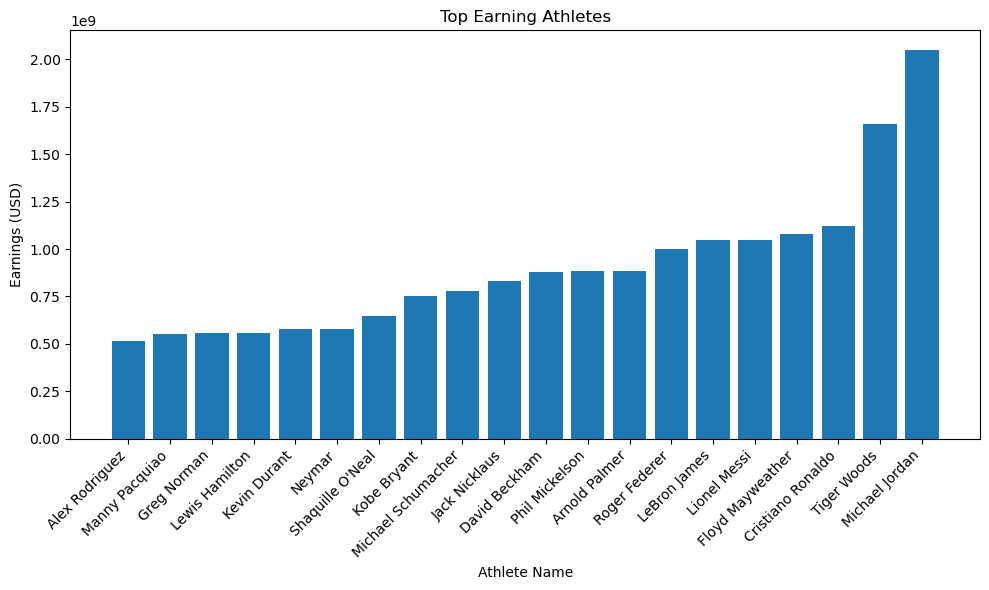

In [2]:
# Plot a bar chart for the earnings
plt.figure(figsize=(10, 6))
# plt.bar(df['Athlete Name'], df['Earnings'])
plt.bar(athlete_df['Athlete Name'], athlete_df['Earnings'])
plt.xlabel('Athlete Name')
plt.ylabel('Earnings (USD)')
plt.title('Top Earning Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

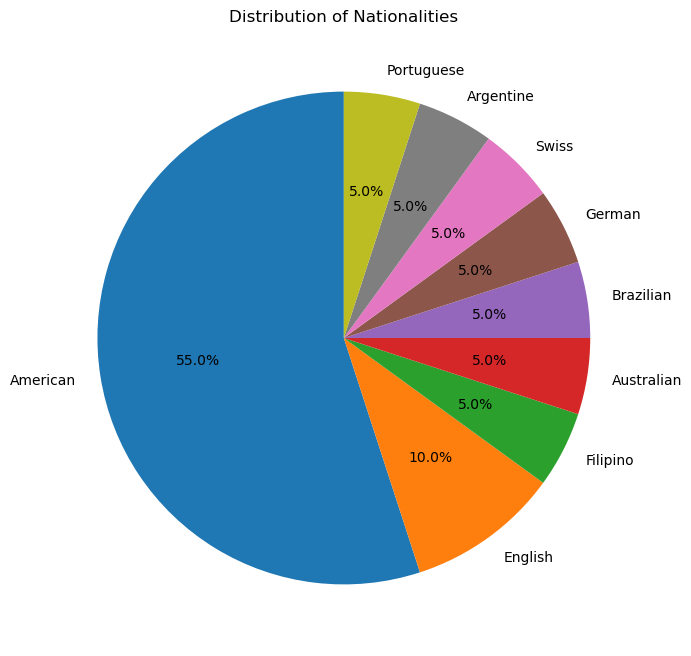

In [3]:
# Plot a pie chart for the distribution of nationalities
nationality_counts = final_df['Nationality'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Nationalities')
plt.show()

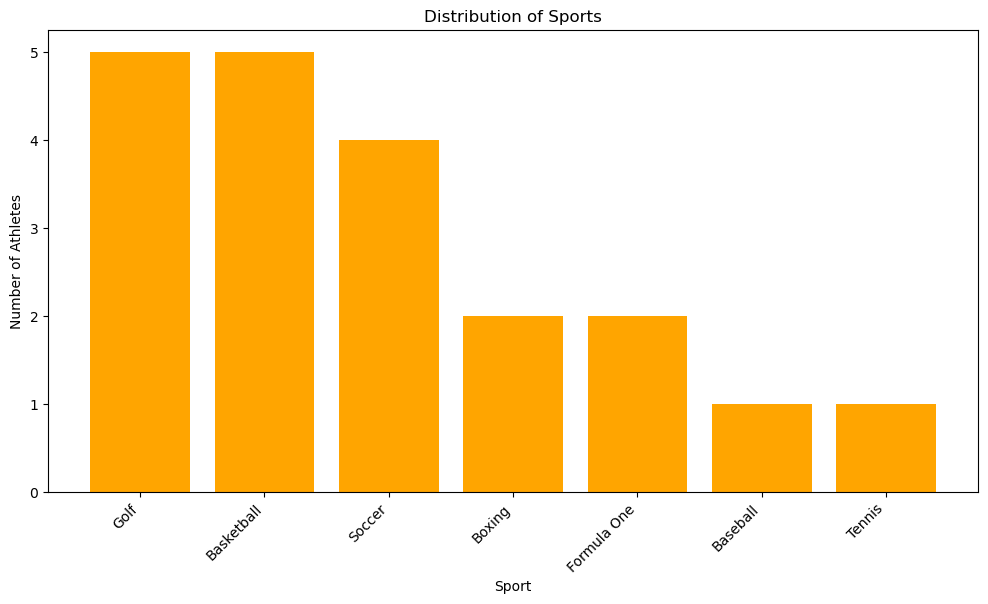

In [4]:
# Plot a bar chart for the distribution of sports
sport_counts = final_df['Sport'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(sport_counts.index, sport_counts, color='orange')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Sports')
plt.xticks(rotation=45, ha='right')
plt.show()